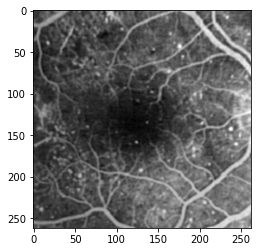

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
my_data = genfromtxt('f3.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)


In [8]:
with open('f2.txt','r') as f1_csv:
    csv_reader = csv.reader(f1_csv)
    for line in csv_reader:
        print(line)

['2', ' 4', ' 5', ' 5', ' 3']
['1', ' 0', ' 5', ' 5', ' 5']
['3', ' 2', ' 3', ' 4', ' 5']
['1', ' 2', ' 3', ' 4', ' 0']
['4', ' 4', ' 4', ' 4', ' 3']


In [9]:
dig = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
np.flip(dig, 0)

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [10]:
f1 = np.array(
        [
            [2, 4, 5, 5, 3],
            [1, 0, 5, 5, 5],
            [3, 2, 3, 4, 5],
            [1, 2, 3, 4, 0],
            [4, 4, 4, 4, 3]
        ])  
    
# print(f1_with_boundary)
# making element a 
a = np.array([
                        [0,1,0],
                        [0,5,0],
                        [0,1,0]])
# img element b
b = np.array([
                        [1,1,1],
                        [1,1,0],
                        [1,1,1]])

c = b -a  
print(c)
# padding_y , padding_x = square_three_ones.shape[0]//2, square_three_ones.shape[1]//2 
# f1_with_boundary = np.pad(f1, ((padding_y, padding_y),(padding_x, padding_x)), mode='constant', constant_values=1)
# print(f1_with_boundary)
np.any(c<0)
itemindex = np.argwhere(b==0)
for item in itemindex  :
    print("y->", item[0],"x->", item[1])
    
np.max(a)

[[ 1  0  1]
 [ 1 -4  0]
 [ 1  0  1]]
y-> 1 x-> 2


5

In [24]:
# delimeters
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

# data = u"1\n1\n1"
# mydata = np.genfromtxt(StringIO(data), delimiter=1)
# print(mydata)
# mydata.reshape(mydata.shape[0],-1).shape

img=genfromtxt('f2.txt', delimiter=',').astype(int)
SE = genfromtxt('SE2.txt', delimiter=',').astype(int)
print(SE.shape[0])
SE= SE.reshape(SE.shape[0],1)
print(SE)

3
[[1]
 [1]
 [1]]


In [ ]:
img=genfromtxt('f3.txt', delimiter=',').astype(int)
SE = genfromtxt('SE4.txt', delimiter=',').astype(int)
print(SE.shape)

rough code above
## Actuall code below :)

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from numpy import genfromtxt
plt.rcParams["figure.figsize"] = (25,5)



def erosion(): 
# Question 1    
#     img=genfromtxt('f1.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE1.txt', delimiter=',').astype(int)


# Question 2
#     img=genfromtxt('f2.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE2.txt', delimiter=',').astype(int)
#     SE= SE.reshape(SE.shape[0],1)


# Question 3
# turn off the axis and gril lines to remove the blue lines in the boder
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE3.txt', delimiter=',').astype(int)
#     SE= SE.reshape(1,SE.shape[0])

# Question 4
# turn off the axis and gril lines to remove the blue lines in the boder
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE4.txt', delimiter=',').astype(int)

# Question 5
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE5.txt', delimiter=',').astype(int)

# Question 6
# check the diff between images to find the difference between eroded and original
    img=genfromtxt('f3.txt', delimiter=',').astype(int)
    SE = genfromtxt('SE6.txt', delimiter=',').astype(int)

    vmax = np.max(img)
    SE_y = SE.shape[0]
    SE_x = SE.shape[1]
    
    # A flag for axes
    turn_off_axes = False
    if (img.shape[0]>10 or img.shape[1]>10):
        turn_off_axes= True
    
    padding_y , padding_x = SE.shape[0]//2, SE.shape[1]//2 
    img_with_boundary = np.pad(img, ((padding_y, padding_y),(padding_x, padding_x)), mode='constant', constant_values=vmax)
    img_subarr = []
    img_erosion = np.zeros((img.shape[0], img.shape[1]), int)
    # get the idx of the 1s in the SE
    SE_one_idxs = np.argwhere(SE==1)
   # find sub-matrices inside the original matrix which are identical to the erosion matrix
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_subarr =  img_with_boundary[i:i+SE_y, j:j+SE_x]
            img_subarr_filtered = []
            # iterate through the idxes 1s in the masking SE elements
            for one_idx in SE_one_idxs:
                img_subarr_filtered.append(img_subarr[one_idx[0],one_idx[1]])
            img_erosion[i,j]=np.amin(img_subarr_filtered)

    print("img: \n",img , end = ' \n\n')
    print("img_boundary: \n",img_with_boundary, end = ' \n\n')
    print("img_eroded: \n",img_erosion, end = ' \n\n')

    # plot main images
    plt.subplot(1,3,1)
    # grid for the image 
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    plt.imshow(img, cmap='gray',vmin=0,vmax=vmax)
    plt.title('img')
    plt.axis('off') if turn_off_axes else None

    # Plot the bordered image
    plt.subplot(1,3,2)
    # grid for the image 
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    
    plt.imshow(img_with_boundary, cmap='gray', vmin=0,vmax=vmax)
    plt.title('img_with_boundary')
    plt.axis('off') if turn_off_axes else None

    # Plot the exepected output
    plt.subplot(1,3,3)
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    
    plt.imshow(img_erosion, cmap='gray',vmin=0,vmax=vmax)
    plt.title('eroded')
    plt.axis('off') if turn_off_axes else None
    plt.show()

# if __name__ == "__main__":
#     erosion()

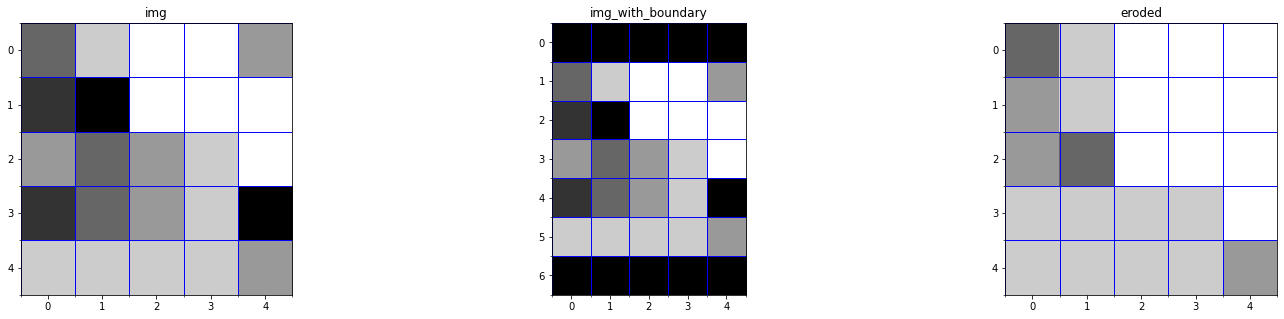

In [26]:
def dilation(): 
# Question 1    
#     img=genfromtxt('f1.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE1.txt', delimiter=',').astype(int)


# Question 2
    img=genfromtxt('f2.txt', delimiter=',').astype(int)
    SE = genfromtxt('SE2.txt', delimiter=',').astype(int)
    SE= SE.reshape(SE.shape[0],1)


# Question 3
# turn off the axis and gril lines to remove the blue lines in the boder
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE3.txt', delimiter=',').astype(int)
#     SE= SE.reshape(1,SE.shape[0])

# Question 4
# turn off the axis and gril lines to remove the blue lines in the boder
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE4.txt', delimiter=',').astype(int)

# Question 5
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE5.txt', delimiter=',').astype(int)

# Question 6
# check the diff between images to find the difference between eroded and original
#     img=genfromtxt('f3.txt', delimiter=',').astype(int)
#     SE = genfromtxt('SE6.txt', delimiter=',').astype(int)

    vmax = np.max(img)
    vmin = np.min(img)
    
    SE_y = SE.shape[0]
    SE_x = SE.shape[1]
    
    # A flag for axes
    turn_off_axes = False
    if (img.shape[0]>10 or img.shape[1]>10):
        turn_off_axes= True
    
    padding_y , padding_x = SE.shape[0]//2, SE.shape[1]//2 
    img_with_boundary = np.pad(img, ((padding_y, padding_y),(padding_x, padding_x)), mode='constant', constant_values=vmin)
    img_subarr = []
    img_erosion = np.zeros((img.shape[0], img.shape[1]), int)
    # get the idx of the 1s in the SE
    SE_one_idxs = np.argwhere(SE==1)
   # find sub-matrices inside the original matrix which are identical to the erosion matrix
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_subarr =  img_with_boundary[i:i+SE_y, j:j+SE_x]
            img_subarr_filtered = []
            # iterate through the idxes 1s in the masking SE elements
            for one_idx in SE_one_idxs:
                img_subarr_filtered.append(img_subarr[one_idx[0],one_idx[1]])
            img_erosion[i,j]=np.amax(img_subarr_filtered)

#     print("img: \n",img , end = ' \n\n')
#     print("img_boundary: \n",img_with_boundary, end = ' \n\n')
#     print("img_eroded: \n",img_erosion, end = ' \n\n')

    # plot main images
    plt.subplot(1,3,1)
    # grid for the image 
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    plt.imshow(img, cmap='gray',vmin=0,vmax=vmax)
    plt.title('img')
    plt.axis('off') if turn_off_axes else None

    # Plot the bordered image
    plt.subplot(1,3,2)
    # grid for the image 
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    
    plt.imshow(img_with_boundary, cmap='gray', vmin=0,vmax=vmax)
    plt.title('img_with_boundary')
    plt.axis('off') if turn_off_axes else None

    # Plot the exepected output
    plt.subplot(1,3,3)
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    
    plt.imshow(img_erosion, cmap='gray',vmin=0,vmax=vmax)
    plt.title('eroded')
    plt.axis('off') if turn_off_axes else None
    plt.show()

dilation()

## Eaindra added starting from here!

Text(0.5, 1.0, 'erosion of f3 by horizontal line')

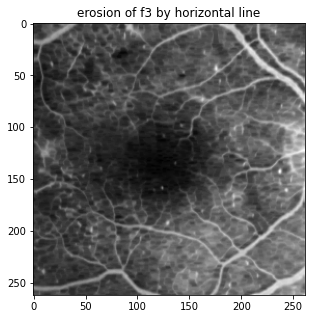

In [27]:
my_data = genfromtxt('ef3_e2.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('erosion of f3 by horizontal line')

Text(0.5, 1.0, 'erosion of f3 by square of size 5')

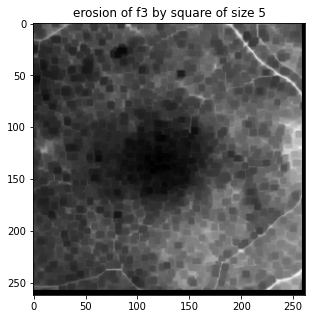

In [28]:
my_data = genfromtxt('ef3_e3.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('erosion of f3 by square of size 5')

Text(0.5, 1.0, 'erosion of f3 by backward diagonal (\\) of length 9')

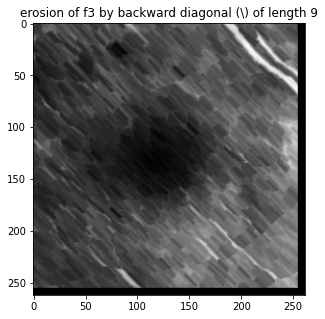

In [29]:
my_data = genfromtxt('ef3_e4.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('erosion of f3 by backward diagonal (\) of length 9')

Text(0.5, 1.0, 'erosion of f3 by forward diagonal (/) of length 9')

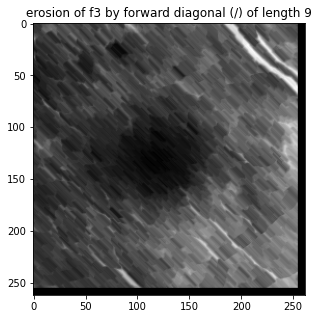

In [30]:
my_data = genfromtxt('ef3_e5.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('erosion of f3 by forward diagonal (/) of length 9')

Text(0.5, 1.0, 'dilation of f3 by square of size 5')

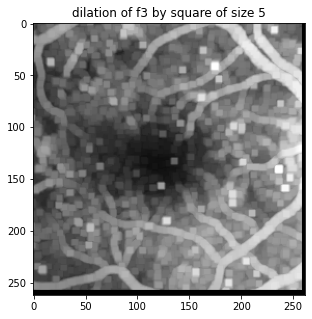

In [31]:
my_data = genfromtxt('df3_d3.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('dilation of f3 by square of size 5')

Text(0.5, 1.0, 'dilation of f3 by backward diagonal of length 9')

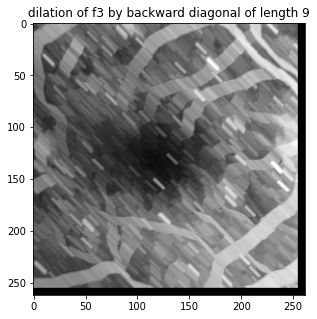

In [32]:
my_data = genfromtxt('df3_d4.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('dilation of f3 by backward diagonal of length 9')

Text(0.5, 1.0, 'dilation of f3 by forward diagonal of length 9')

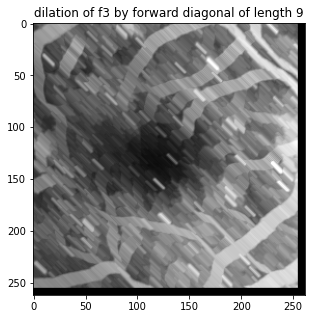

In [33]:
my_data = genfromtxt('df3_d5.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('dilation of f3 by forward diagonal of length 9')

Text(0.5, 1.0, 'opening of f3 by square 5')

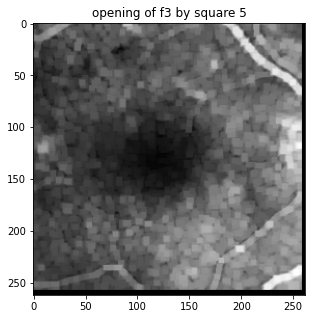

In [35]:
my_data = genfromtxt('of3_o3.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('opening of f3 by square 5')

Text(0.5, 1.0, 'opening of f3 by backward diagonal of length 9')

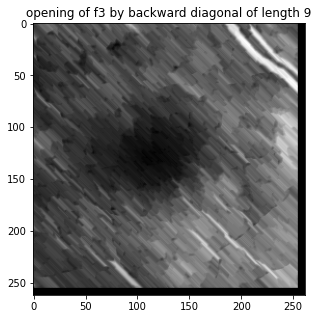

In [34]:
my_data = genfromtxt('of3_o4.txt', delimiter=',').astype(int)
max_val=np.max(my_data)
plt.imshow(my_data, cmap='gray',vmin=0,vmax=max_val)
plt.title('opening of f3 by backward diagonal of length 9')

Text(0.5, 1.0, 'erosion of cell')

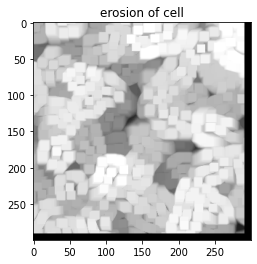

In [4]:
erosion_1 = genfromtxt('self_experiment_1_dilation.txt', delimiter=',').astype(int)
max_val=np.max(erosion_1)
plt.imshow(erosion_1, cmap='gray',vmin=0,vmax=max_val)
plt.title('erosion of cell')



Text(0.5, 1.0, 'dilation of cell')

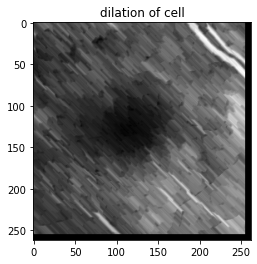

In [5]:
dilation_1 = genfromtxt('of3_o4.txt', delimiter=',').astype(int)
max_val=np.max(dilation_1)
plt.imshow(dilation_1, cmap='gray',vmin=0,vmax=max_val)
plt.title('dilation of cell')